In [1]:
import wget
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
"""No need to upload this file every time since we already have a copy handy"""
#url = 'https://raw.githubusercontent.com/MLEveryday/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv'
#Social_Network_Ads = wget.download(url)

'No need to upload this file every time since we already have a copy handy'

In [3]:
#data = pd.read_csv(Social_Network_Ads, error_bad_lines=False)
#file = r'highscore.csv'
#df = pd.read_csv(file)
file = r'epilepsy_network.csv'
data = pd.read_csv(file, error_bad_lines=False)
data.head()

,User ID,Gender,Age,FamilyHistoryIndex,EstimatedMedDosageIndex,Seizures
0,15624510,Male,19,7,19000,0
1,15810944,Male,35,4,20000,0
2,15668575,Female,26,4,43000,0
3,15603246,Female,7,78,57000,0
4,15804002,Male,11,19,76000,0


In [4]:
feature_cols = ['Age','FamilyHistoryIndex','EstimatedMedDosageIndex' ]
X = data.iloc[:,[2,3,4]].values
y = data.iloc[:,5].values
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#Fit classifier with no prunning at all
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)
#Make predictions and check accuracy
#prediction
y_pred = classifier.predict(X_test)
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9


In [5]:
print('Tree Depth:', classifier.get_depth())
print('Number of Leafes:', classifier.get_n_leaves())

Tree Depth: 11
Number of Leafes: 43


C:\Users\pmankowski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


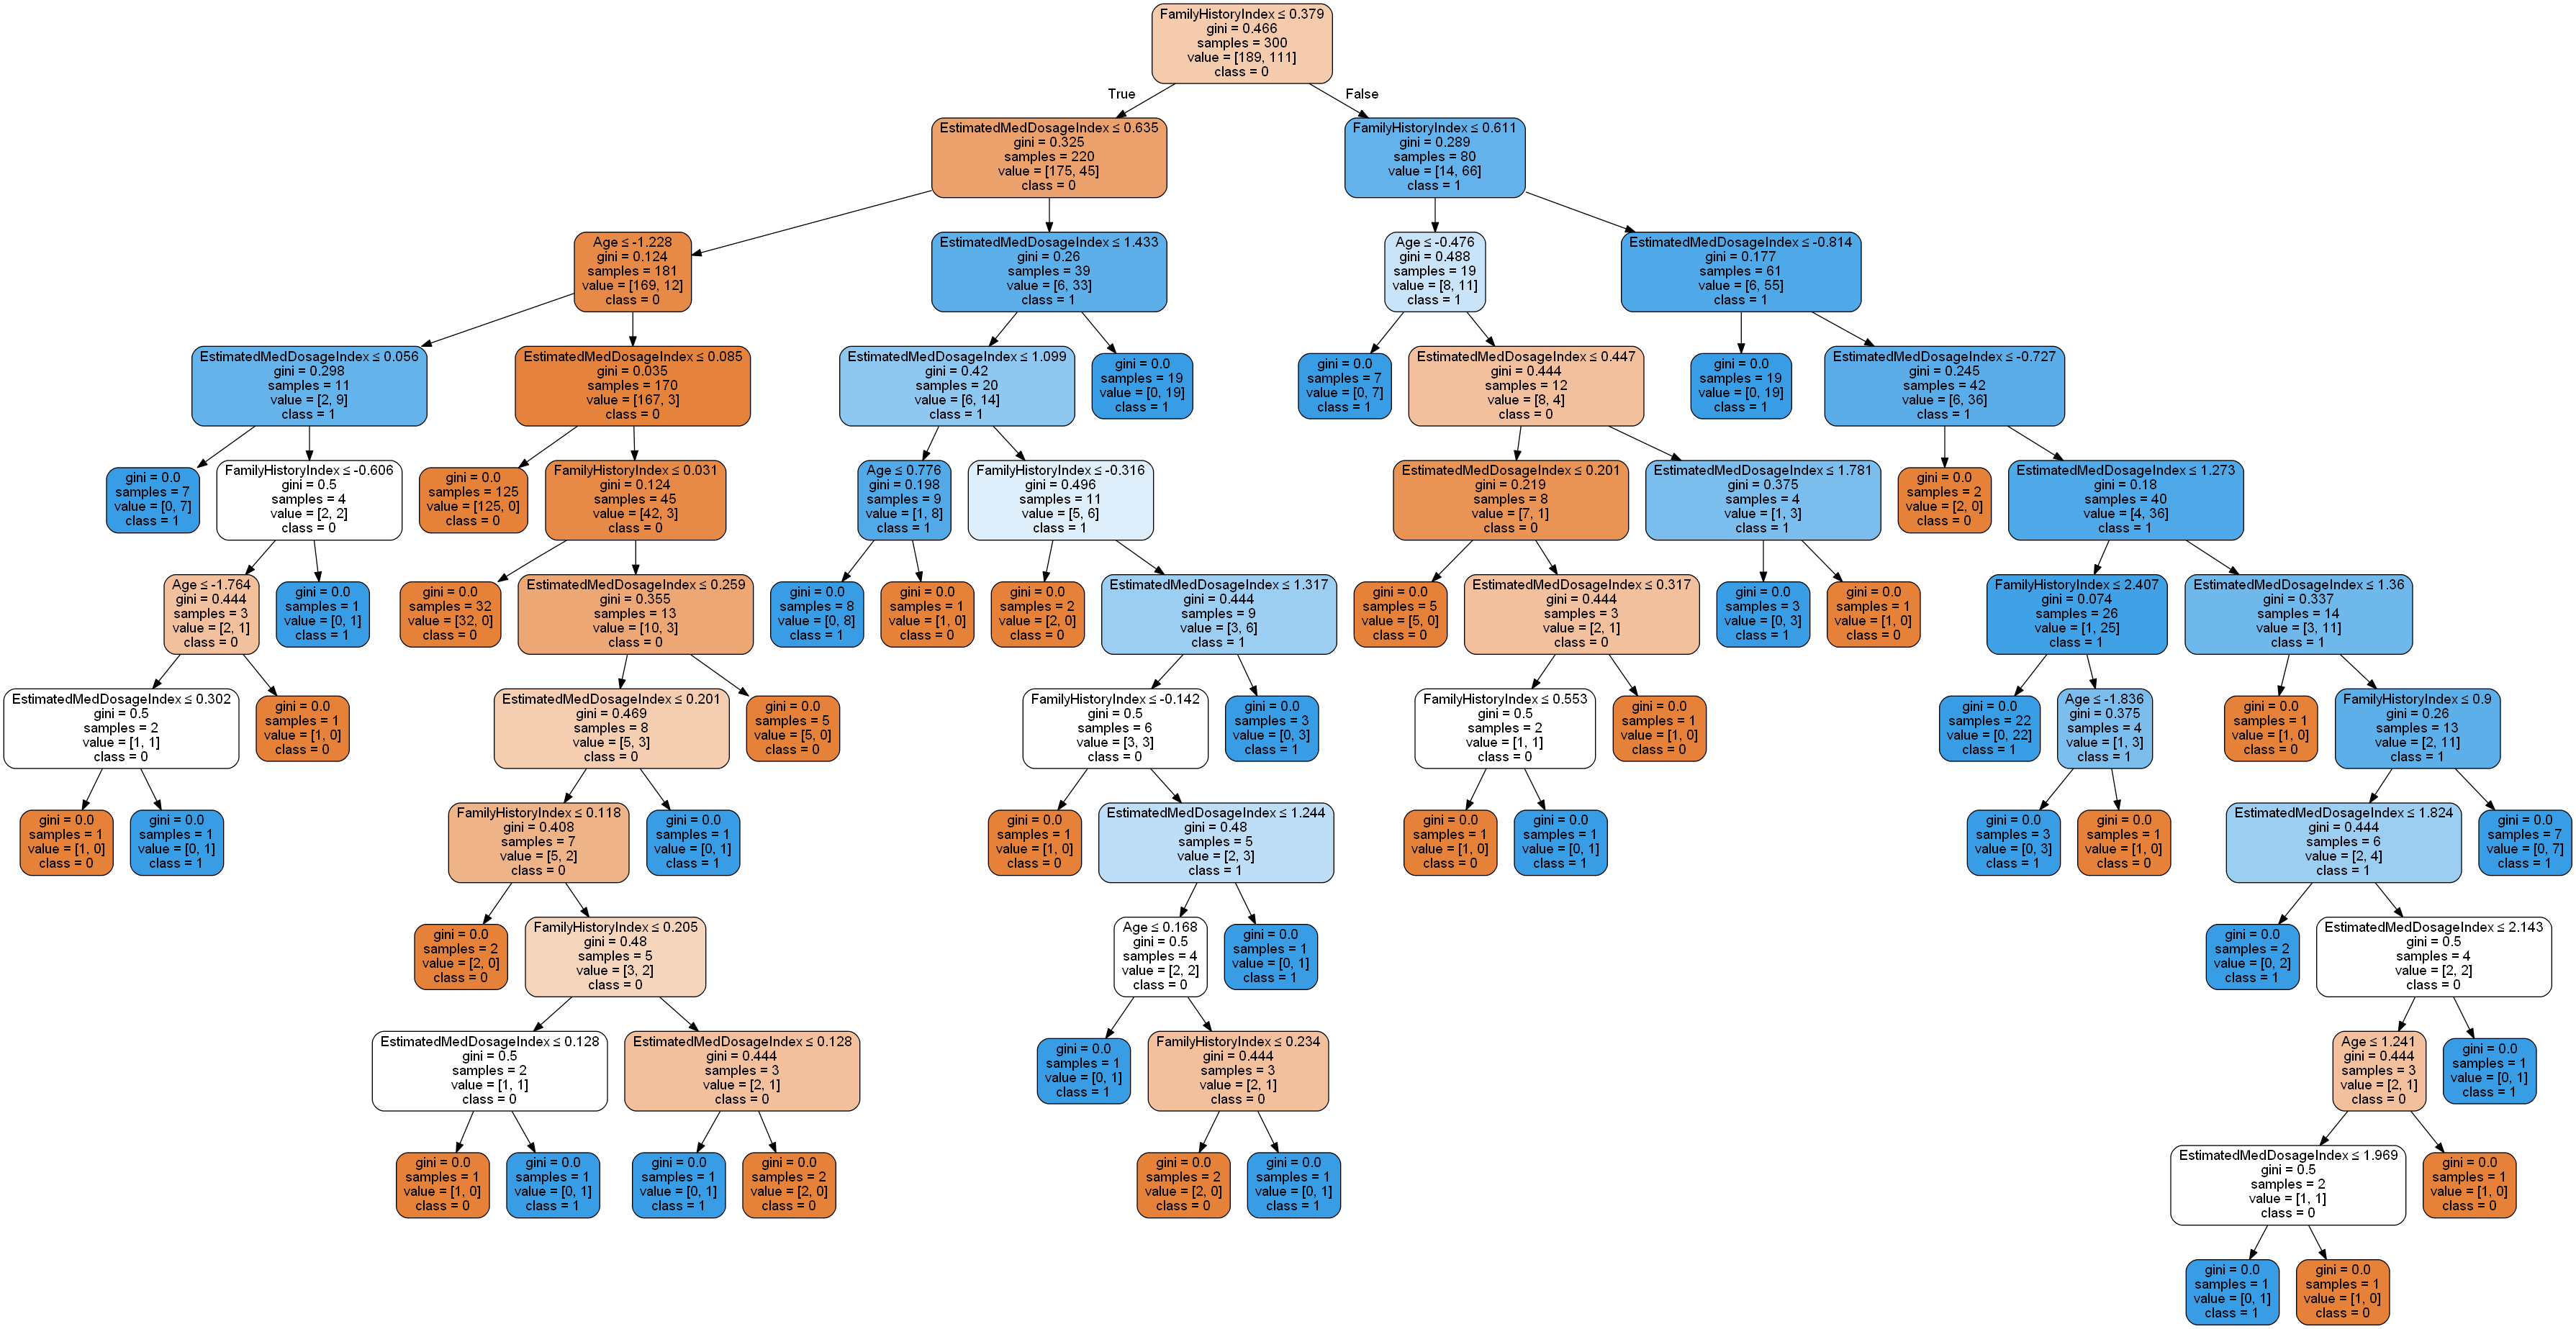

In [6]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
# Create Decision Tree classifer object with prunning and layer control configuration
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=6)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


In [8]:
print('Pruned Tree Depth:', classifier.get_depth())
print('Pruned Number of Leafes:', classifier.get_n_leaves())

Pruned Tree Depth: 6
Pruned Number of Leafes: 23


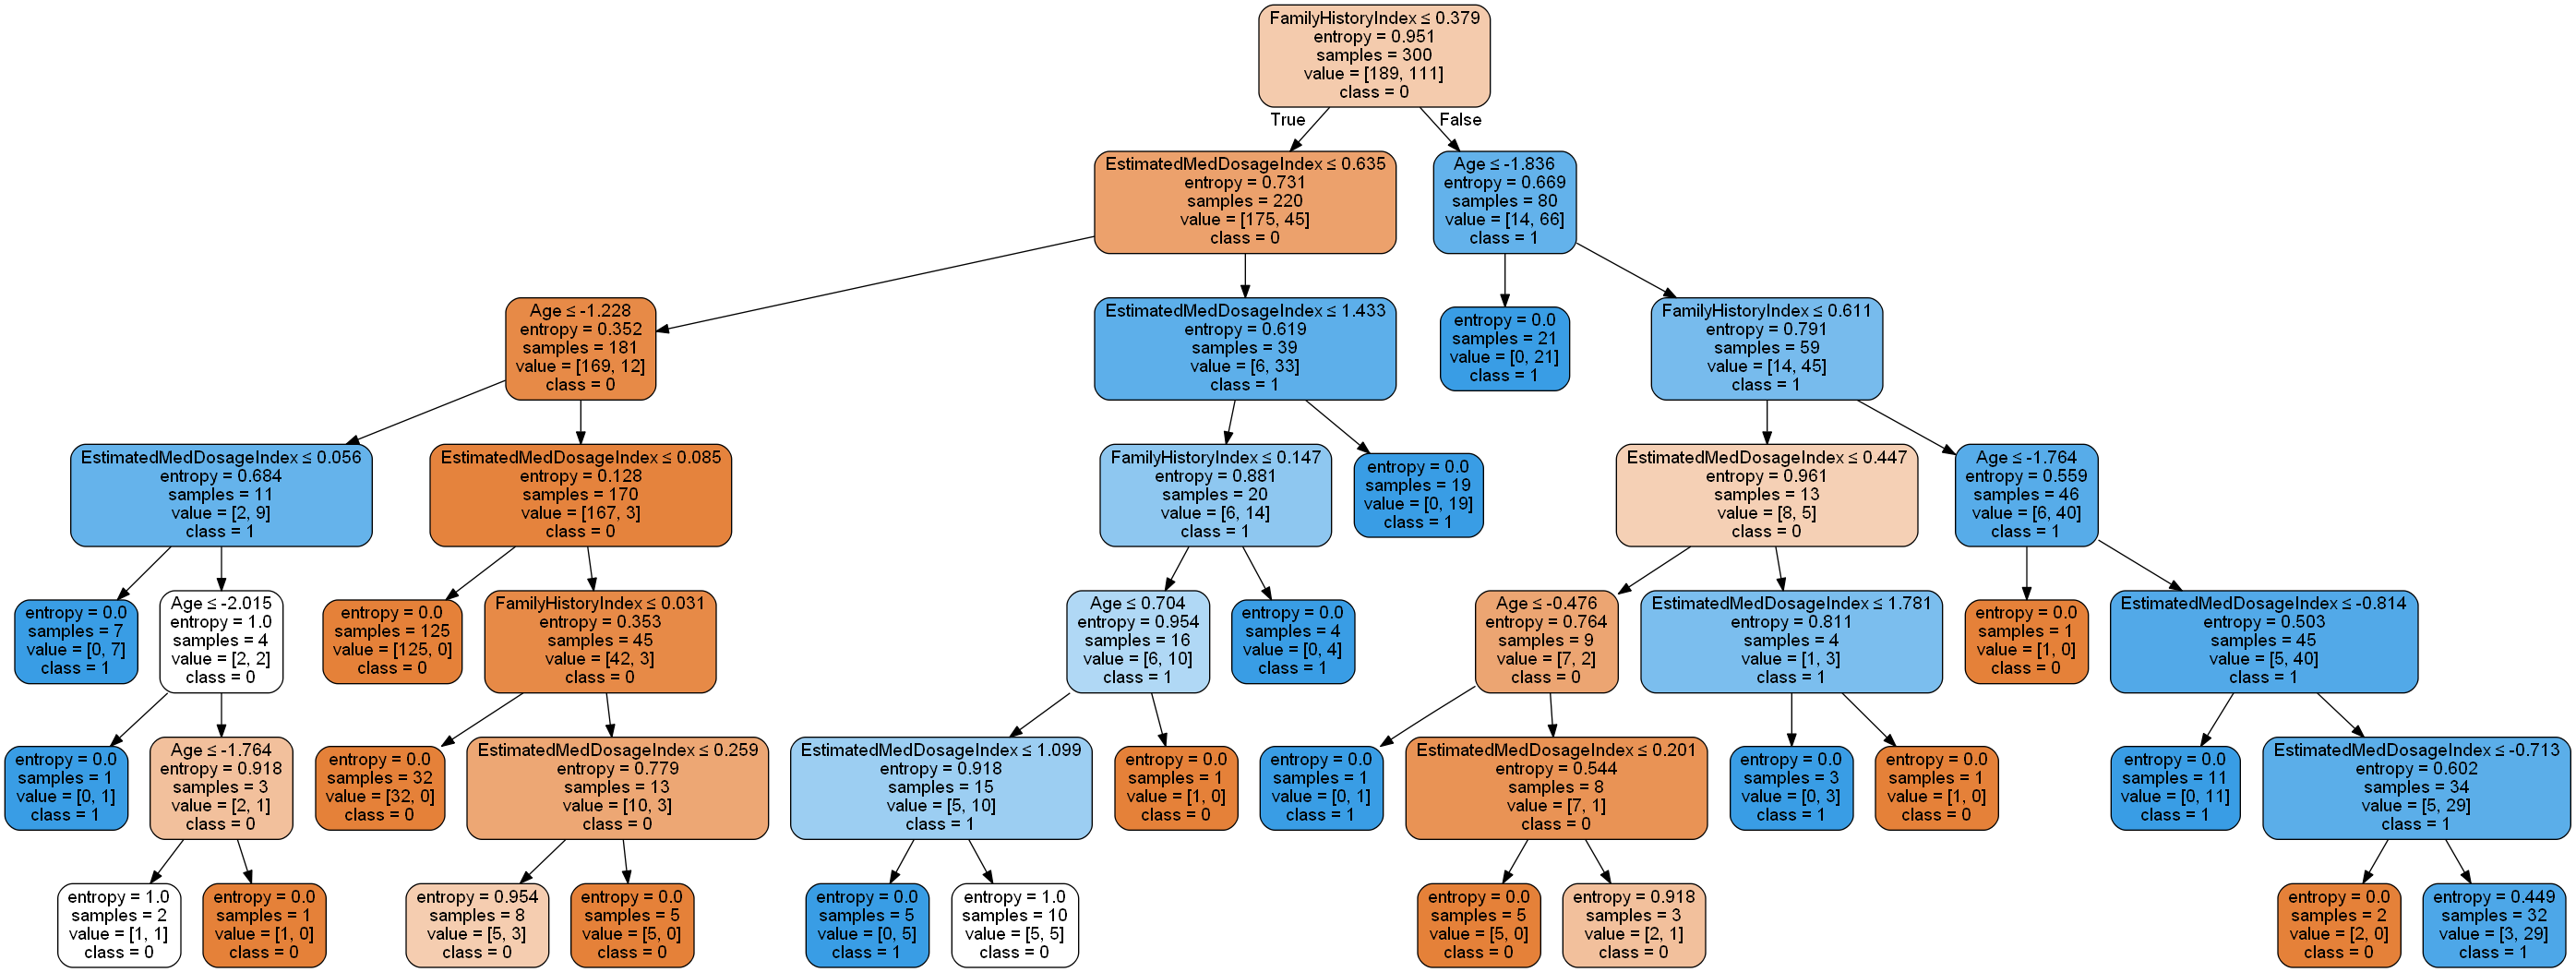

In [9]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())